# Regresión Lineal - Breast Cancer

## Importación de librerias
** Importar pandas, numpy, matplotlib,y seaborn. Luego establezca %matplotlib inline 
(Importará sklearn a medida que lo necesite.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Recuperar los datos

** Lea en el archivo csv llamado breast_cancer como un DataFrame llamado datos**

In [2]:
datos = pd.read_csv('breast_cancer.csv')

**Revise las primeras filas, y reviselas con los métodos info() y describe().**

In [3]:
datos.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
datos.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## Análsis de Datos Exploratorios

In [55]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

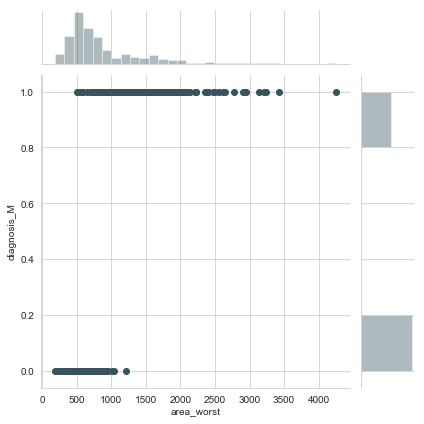

In [56]:
data_feats = ['diagnosis']
final_data = pd.get_dummies(datos, columns = data_feats, drop_first=False)
sns.jointplot(x="area_worst", y="diagnosis_M", data=final_data)

## Datos de entrenamiento y prueba

In [57]:
final_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0,1


In [58]:
y = final_data['diagnosis_M']

In [59]:
X = final_data[['area_mean', 'area_worst']]

** Use model_selection.train_test_split de sklearn para dividir los datos en el conjunto de entrenamiento y prueba. Establezca test_size=0.3 y random_state=101**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Entrenamiento del modelo

¡Ahora es el momento de entrenar a su modelo con nuestros datos de entrenamiento!

** Importar LinearRegression desde sklearn.linear_model **

In [62]:
from sklearn.linear_model import LinearRegression

**Crear una instancia del modelo LinearRegression() llamado lm.**

In [63]:
lm = LinearRegression()

** Entrenar/ajustar lm con los datos de entrenamiento.**

In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Imprima los coeficientes del modelo**

In [65]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
area_mean,0.000234
area_worst,0.000451


## Predicción con los datos de prueba
Ahora que hemos ajustado nuestro modelo, ¡evaluemos su rendimiento prediciendo los valores de prueba!

** Use lm.predict () para predecir el conjunto X_test de los datos.**

In [66]:
predictions = lm.predict(X_test)
predictions

array([ 0.17695308,  0.30354643,  0.21403992,  0.56844384,  0.16671918,
        0.25681036,  0.00476534,  1.11171968,  0.21166071,  0.10833413,
        0.40801216,  0.16305468,  0.15418567,  0.22715776,  0.63477566,
        0.04799409,  0.23691198,  0.08821204,  1.0325162 ,  0.31974922,
        0.14882263,  0.03503519,  0.19024033,  0.17454161,  0.67231529,
        0.18361899,  0.41898656,  0.08440276,  0.57891753,  0.13615649,
        0.22132753,  0.27735699,  0.25872555,  0.58975747,  0.20328478,
        0.11692087,  0.65111812,  0.2870632 ,  0.97477335,  1.19808798,
        0.60354837,  0.15591888,  0.17650557,  0.36516028,  0.08836412,
        0.1463805 ,  0.79760061,  0.36609467,  0.33326094,  0.16554876,
        0.74151486,  0.27090875,  0.26078487,  0.93916057,  0.14350452,
        0.19603487,  0.63865364,  0.87860612,  0.18290555,  0.20428939,
        0.47573072,  0.33574807,  0.21130008,  0.1376086 ,  0.97293338,
        0.21991271,  0.21812854,  0.96669961,  0.83575082,  0.23

** Cree un diagrama de dispersión de los valores de prueba reales frente a los valores predichos. **

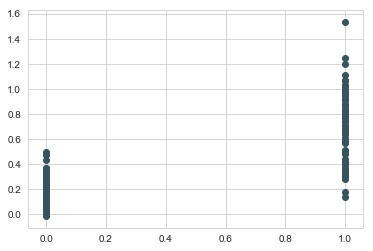

In [67]:
plt.scatter(y_test,predictions)

## Evaluación del modelo

Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y la puntuación de varianza explicada (R ^ 2).

** Calcule el error absoluto promedio, el error cuadrado promedio y la raíz del error cuadrático promedio.**

In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2584948584294976
MSE: 0.1010542110110151
RMSE: 0.3178902499464479


## Residuales

Deberías haber obtenido un modelo muy bueno con un buen ajuste. Exploremos rápidamente los residuos para asegurarnos de que todo esté bien con nuestros datos.

**Trace un histograma de los residuos y asegúrese de que se vea distribuido normalmente. Utilice ya sea distplot de seaborn o simplemente plt.hist ()**

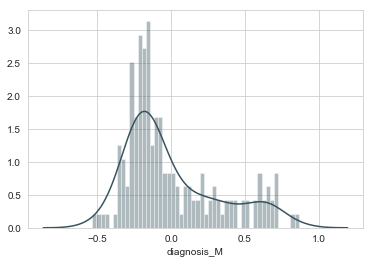

In [69]:
sns.distplot((y_test-predictions),bins=50)

## ¡Excelente trabajo!